 Este estudo visa realizar uma análise exploratória de dados (EDA) para medir a performance em bolsa das grandes empresas que dominam o mercado de tecnologia: Facebook (META), Apple, Amazon, Netflix e Google (MAANG)
 
 O objetivo é realizar um recorte temporal durante o choque da covid-19 ocorrido entre 2019 - 2022, e avaliar se essas empresas podem ser opções viáveis de investimento em carteira durante épocas de crise

Assim, neste breve estudo será avaliado medidas de risco, retorno e performance, utilizando os preços de fechamento das ações extraídos da API do yahoo finance 

----------------------------------------------------------------------------------------------------------------
Passo 1 - importando as principais blibliotecas 

In [27]:
import numpy as np
import matplotlib.pyplot as plt 
from pandas_datareader import data as wb
import seaborn as sns
sns.set()

------------------------------------------------
Passo 2 - Importando os dados necessários em um DataFrame 

In [9]:
Lista_ações = ["META", "AAPL","AMZN","NFLX","GOOG", "^GSPC"]

In [10]:
MAANG_stocks = wb.DataReader(Lista_ações, data_source = "yahoo", start = "2019-01-01")["Adj Close"]

In [11]:
#Visualização prévia da base de dados:

MAANG_stocks.head()

Symbols,META,AAPL,AMZN,NFLX,GOOG,^GSPC
Date,,,,,,
2019-01-02,135.679993,38.168346,76.956497,267.660004,52.292500,2510.030029
2019-01-03,131.740005,34.366508,75.014000,271.200012,50.803001,2447.889893
2019-01-04,137.949997,35.833580,78.769501,297.570007,53.535500,2531.939941
2019-01-07,138.050003,35.753822,81.475502,315.339996,53.419498,2549.689941
2019-01-08,142.529999,36.435398,82.829002,320.269989,53.813999,2574.409912


In [12]:
MAANG_stocks.rename(columns = {"^GSPC" : "S&P 500"}, inplace = True)

In [13]:
MAANG_stocks.head()

Symbols,META,AAPL,AMZN,NFLX,GOOG,S&P 500
Date,,,,,,
2019-01-02,135.679993,38.168346,76.956497,267.660004,52.292500,2510.030029
2019-01-03,131.740005,34.366508,75.014000,271.200012,50.803001,2447.889893
2019-01-04,137.949997,35.833580,78.769501,297.570007,53.535500,2531.939941
2019-01-07,138.050003,35.753822,81.475502,315.339996,53.419498,2549.689941
2019-01-08,142.529999,36.435398,82.829002,320.269989,53.813999,2574.409912


-------------------
Passo 3 - Estatísticas Descritivas 

In [21]:
stock_statistics = round(MAANG_stocks.describe(),2)

In [24]:
stock_statistics

Symbols,META,AAPL,AMZN,NFLX,GOOG,S&P 500
count,930.00,930.00,930.00,930.00,930.00,930.00
mean,238.39,106.89,131.40,415.98,93.25,3606.69
std,64.58,44.04,33.61,124.00,31.71,656.01
min,131.74,34.37,75.01,166.37,50.80,2237.40
25%,185.20,63.69,94.40,332.73,63.16,2987.07
50%,217.74,118.02,139.40,391.40,86.29,3519.29
75%,284.60,145.35,162.13,514.18,120.81,4206.53
max,382.18,181.26,186.57,691.69,150.71,4796.56


<AxesSubplot:>

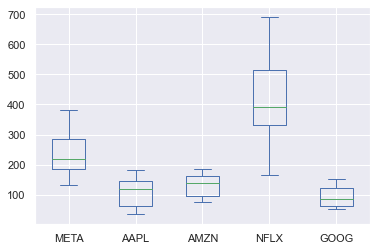

In [52]:
MAANG_stocks.iloc[:,0:5].plot(kind = "box")

   Observa-se que através das estatísticas descritivas que as ações do grupo MAANG tem estatísticas bem distintas em termos de volatilidade e média de preço.
   
   Por exemplo, as ações da Netflix são as mais valorizadas entre as outras do grupo (com base na média demonstrada no Boxplot), porém também se destaca por apresentar a maior volatilidade de valores ao longo das distribuições comparadas.
   
   Esse comporatamento é um manifestação clara do dilema entre risco e retorno presente na economia e no mundo das finanças 


--------------------------------
4 - Avaliação histórica de retornos mensais 

In [72]:
MAANG_monthly_stocks = MAANG_stocks.iloc[:,0:6].asfreq("m").dropna()

In [76]:
MAANG_monthly_return = MAANG_monthly_stocks.pct_change(periods =1).mul(100)

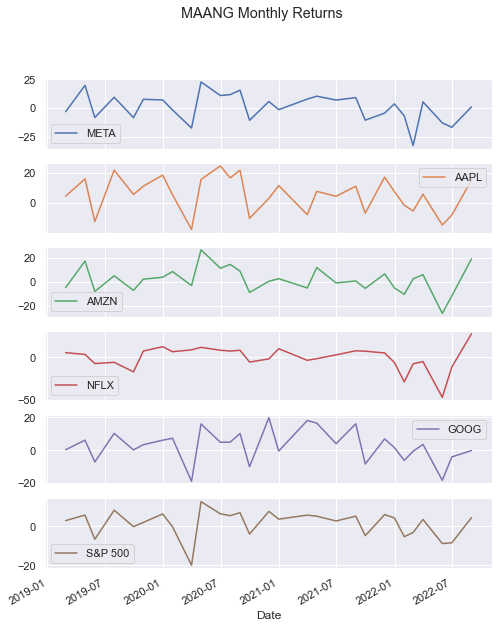

In [147]:
MAANG_monthly_return.plot(subplots = True, figsize = (8,10), title = "MAANG Monthly Returns")
plt.show()

In [109]:
goog_return = np.array(MAANG_monthly_return.iloc[:,4].reset_index(drop = True))
sp_return = np.array(MAANG_monthly_return.iloc[:,5].reset_index(drop = True))

In [114]:
np.corrcoef(goog_return[1:],sp_return[1:])

array([[1.        , 0.85530734],
       [0.85530734, 1.        ]])



Através da análise de retorno, pode-se observar que as ações menos correlacionadas com a perfromance do S&P500 são as ações da Netflix e da Amazon dentro do período analisado. Essa constatação fica mais clara quando avalia-se os resultados para o período de maior depressão da crise do covid-19 (por volta de 2020-04 no gráfico), onde somente essas duas empresas conseguiram sustentar os seus retornos mensais em face ao choque negativo na bolsa.

As outras empresas do grupo MAANG, possuem forte correlação positiva com o índice S&P500, o que as tornam menos atrativas quando  objetivo é proteger o portifólio de choques e crises. 

o Google, por exemplo, apresentou uma correção postiva forte de 86% com o índice da bolsa, demonstrando que as flutuações dos preços das ações seguem a tendência geral do mercado

-----------------------------------------------
5 - Análise da série temporal (via normalização)

In [117]:
primeiro_preço = MAANG_stocks.iloc[0]
primeiro_preço

Symbols
META        135.679993
AAPL         38.168346
AMZN         76.956497
NFLX        267.660004
GOOG         52.292500
S&P 500    2510.030029
Name: 2019-01-02 00:00:00, dtype: float64

In [122]:
performance_stocks = MAANG_stocks.div(primeiro_preço).mul(100)
performance_stocks

Symbols,META,AAPL,AMZN,NFLX,GOOG,S&P 500
Date,,,,,,
2019-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-01-03,97.096118,90.039291,97.475850,101.322577,97.151603,97.524327
2019-01-04,101.673057,93.882977,102.355881,111.174626,102.377014,100.872894
2019-01-07,101.746765,93.674014,105.872155,117.813641,102.155183,101.580057
2019-01-08,105.048649,95.459724,107.630941,119.655527,102.909594,102.564905
...,...,...,...,...,...,...
2022-09-02,118.160389,408.217836,165.691016,84.476574,207.830953,156.343150
2022-09-06,116.848468,404.864275,163.871804,81.592317,205.536175,155.702916
2022-09-07,118.211975,408.610855,168.250896,85.541360,211.273135,158.558665


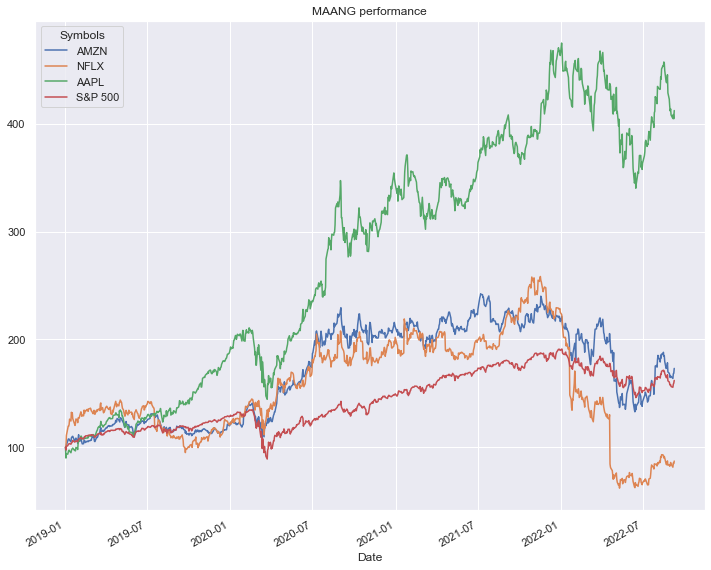

In [146]:
performance_stocks.loc[:,["AMZN","NFLX","AAPL","S&P 500"]].plot(figsize = (12,10), title = "MAANG performance")
plt.show()

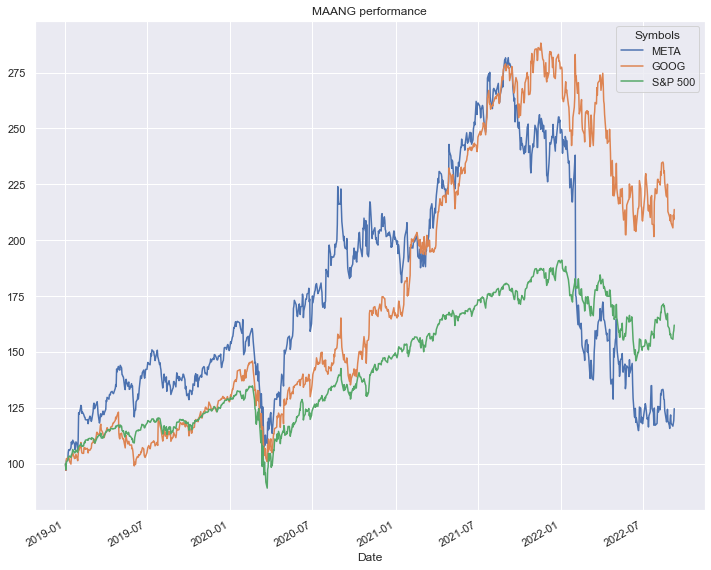

In [148]:
performance_stocks.loc[:,["META","GOOG","S&P 500"]].plot(figsize = (12,10), title = "MAANG performance")
plt.show()

   Em relação à análise de flutuação dos preços das ações, observa-se que as ações da Apple, Google e Meta valorizaram vertiginozamente mesmo nos tempos de pandemia quando comparadas ao primeiro valor da série histórica, porém permaneceram fortemente correlacionadas ao S&P 500.

   As ações da Amazon e da Netflix também valorizaram ao longo do tempo (em menor medida), e conseguiram performar acima do benchmark de mercado (S&P 500) no auge da pandemia
   
   Por fim, após o início de 2022, todas as ações interromperam a tendência de crescimento  e passam a ter fortes oscilações e ataques especulativos, sinalizando riscos não desejáveis mesmo para investidores mais arrojados 

------------------------------------

6 - Conclusões

 É fato que as firmas do grupo MAANG são grandes oportunidades de investimento mesmo em um cenário de crise como aquele vivido pelo choque do Covid-19, porém deve-se ter cuidado ao colocar essas empresas no portifólio de ações, principalmente pela volatilidade e correlação que todas elas apresentaram com o benchmark S&P500. 

 Mesmo as ações da Amazon e da Netflix que apresentram retornos mensais com menores correlações com o benchmark S&P500, ainda estão fortemente associadas aos movimentos de valorização e desvalorização da bolsa em geral e não tem força suficiente para fazer frente a possiveis cenários de incerteza
 
 Outro ponto de atenção é que essas empresas podem experienciar quedas bruscas repentinas como aquela percebida após o início de 2022, o que pode prejudicar a performance de carteiras mais arrojadas, afetar o planejamento de investimentos futuros e quebrar expectativas pré-concebidas na economia.